In [2]:
import numpy as np
import pandas as pd

In [3]:
books = pd.read_csv('books.csv', low_memory=False)
users = pd.read_csv('users.csv')
ratings = pd.read_csv('ratings.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'books.csv'

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
ratings['Book-Rating'].max()

10

In [7]:
ratings['Book-Rating'].min()

0

In [8]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [9]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [11]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [12]:
books.duplicated().sum()

0

In [13]:
users.duplicated().sum()

0

In [14]:
ratings.duplicated().sum()

0

## Popularity Based Recommender System

In [15]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [16]:
ratings_with_name.shape

(1031136, 10)

In [17]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [18]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [19]:
ratings_with_name['Book-Rating'] = pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce')
ratings_with_name = ratings_with_name.dropna(subset=['Book-Rating'])
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [20]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [21]:
popular_df['num_ratings'].min()
popular_df['num_ratings'].max()

2502

In [22]:
popular_df.shape

(241071, 3)

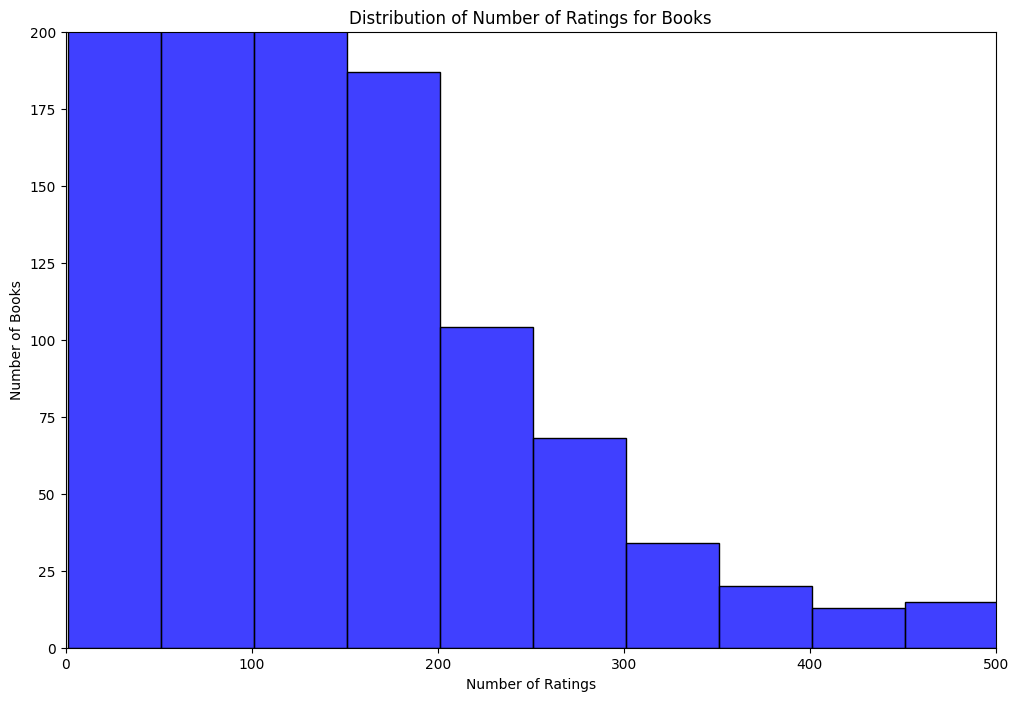

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.histplot(popular_df['num_ratings'], bins=50, kde=False, color='blue', edgecolor='black')
plt.title('Distribution of Number of Ratings for Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Books')
plt.xlim(0, 500)
plt.ylim(0, 200)
plt.show()

In [24]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False)

In [25]:
popular_df.shape

(186, 3)

In [26]:
popular_df = popular_df.head(50)

In [27]:
popular_df.shape

(50, 3)

In [1]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

NameError: name 'popular_df' is not defined

In [ ]:
popular_df

## Collaborative Filtering Based Recommender System

In [29]:
ratings_with_name.groupby('User-ID').count()['Book-Rating']

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92106, dtype: int64

In [30]:
user_books_count = ratings_with_name.groupby('User-ID').count()['Book-Rating'].reset_index()
user_books_count

,User-ID,Book-Rating
0,2,1
1,8,17
2,9,3
3,10,1
4,12,1
...,...,...
92101,278846,1
92102,278849,4
92103,278851,23
92104,278852,1


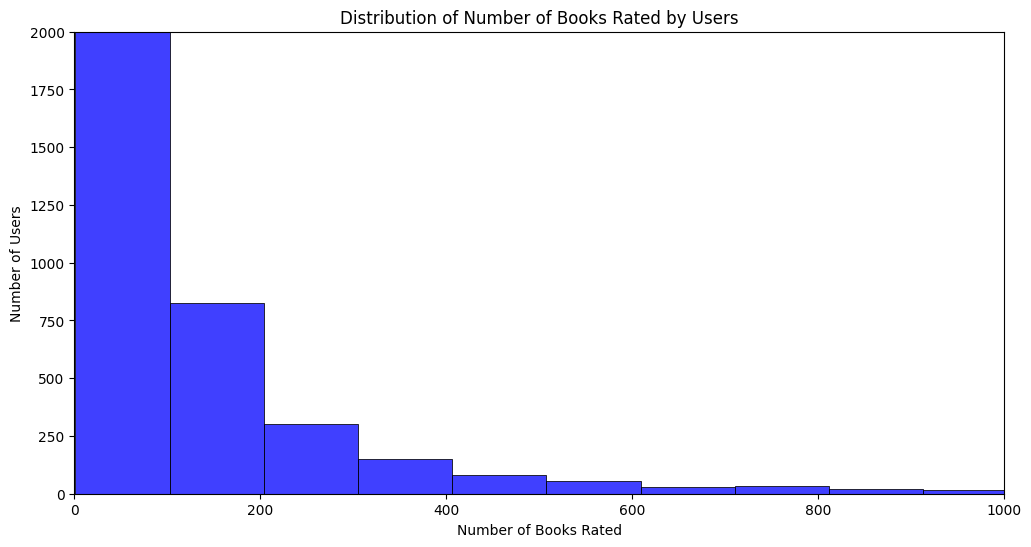

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(user_books_count['Book-Rating'], bins=110, kde=False, color='blue', edgecolor='black')
plt.title('Distribution of Number of Books Rated by Users')
plt.ylabel('Number of Users')
plt.xlabel('Number of Books Rated')
plt.xlim(0, 1000)
plt.ylim(0, 2000)
plt.show()

In [32]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 100
x[x]

User-ID
254       True
507       True
882       True
1424      True
1435      True
          ... 
277478    True
277639    True
278137    True
278188    True
278418    True
Name: Book-Rating, Length: 1648, dtype: bool

In [33]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 100
experienced_users = x[x].index

In [34]:
x[x]

User-ID
254       True
507       True
882       True
1424      True
1435      True
          ... 
277478    True
277639    True
278137    True
278188    True
278418    True
Name: Book-Rating, Length: 1648, dtype: bool

In [35]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(experienced_users)]

In [36]:
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
14,77480,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031115,276680,0812881311,0,Streets of Gold,Evan Hunter,1985,Madison Books,http://images.amazon.com/images/P/0812881311.0...,http://images.amazon.com/images/P/0812881311.0...,http://images.amazon.com/images/P/0812881311.0...
1031116,276680,0865055041,0,Kitchen (Historic Communities (Paperback)),Bobbie Kalman,1990,Crabtree Publishing Company,http://images.amazon.com/images/P/0865055041.0...,http://images.amazon.com/images/P/0865055041.0...,http://images.amazon.com/images/P/0865055041.0...
1031117,276680,086505505X,0,Home Crafts (Historic Communities (Paperback)),Bobbie Kalman,1990,Crabtree Publishing Company,http://images.amazon.com/images/P/086505505X.0...,http://images.amazon.com/images/P/086505505X.0...,http://images.amazon.com/images/P/086505505X.0...
1031118,276680,1564407284,0,"The Old Sturbridge Village Cookbook, 2nd : Aut...",Caroline Sloat,1995,Globe Pequot,http://images.amazon.com/images/P/1564407284.0...,http://images.amazon.com/images/P/1564407284.0...,http://images.amazon.com/images/P/1564407284.0...


In [37]:
book_ratings_count = filtered_rating.groupby('Book-Title').count()['Book-Rating'].reset_index()
book_ratings_count.describe()

,Book-Rating
count,178335.000000
mean,3.319012
std,9.040947
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,556.000000


In [38]:
book_ratings_count['Book-Rating'].median()

1.0

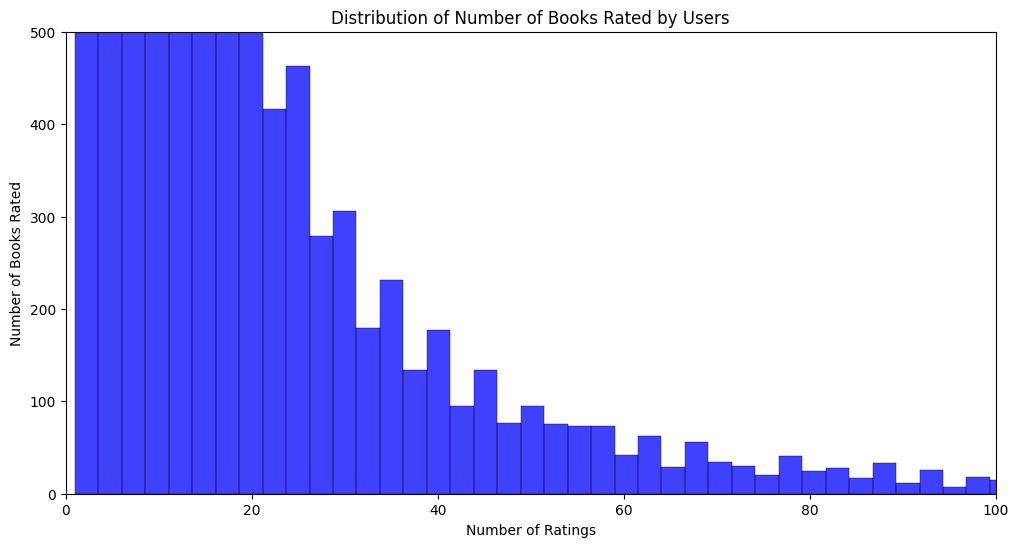

In [39]:
plt.figure(figsize=(12, 6))
sns.histplot(book_ratings_count['Book-Rating'], bins=220, kde=False, color='blue', edgecolor='black')#, orientation='horizontal')
plt.title('Distribution of Number of Books Rated by Users')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Books Rated')
plt.xlim(0, 100)
plt.ylim(0, 500)
plt.show()

In [40]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [41]:
y[y]

Book-Title
1984                                                                 True
1st to Die: A Novel                                                  True
2010: Odyssey Two                                                    True
204 Rosewood Lane                                                    True
24 Hours                                                             True
                                                                     ... 
Year of Wonders                                                      True
You Belong To Me                                                     True
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values    True
Zoya                                                                 True
\O\" Is for Outlaw"                                                  True
Name: Book-Rating, Length: 1070, dtype: bool

In [42]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [43]:
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
67,8253,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...
1029756,274004,037572799X,0,In Pursuit of the Proper Sinner,Elizabeth George,2000,Random House Large Print Publishing,http://images.amazon.com/images/P/037572799X.0...,http://images.amazon.com/images/P/037572799X.0...,http://images.amazon.com/images/P/037572799X.0...
1030363,274808,0449701913,0,Homecoming,Cynthia Voigt,1983,Fawcett Books,http://images.amazon.com/images/P/0449701913.0...,http://images.amazon.com/images/P/0449701913.0...,http://images.amazon.com/images/P/0449701913.0...


In [44]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [45]:
pt.fillna(0,inplace=True)

In [48]:
from sklearn.metrics.pairwise import cosine_similarity

In [49]:
similarity_scores = cosine_similarity(pt)

In [50]:
similarity_scores.shape

(1070, 1070)

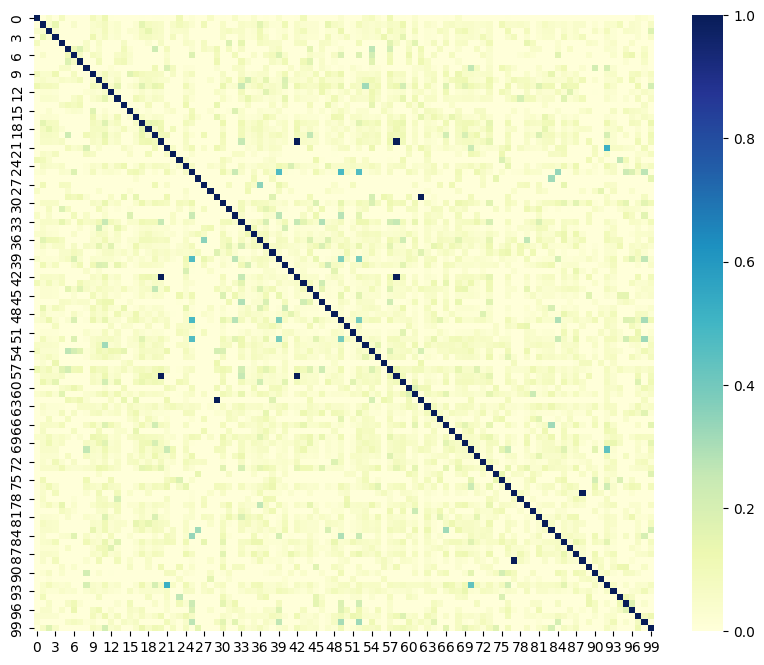

In [51]:

subset_size = 100  
random_subset_indices = np.random.choice(range(len(similarity_scores)), size=subset_size, replace=True)

subset_matrix = similarity_scores[random_subset_indices][:, random_subset_indices]

plt.figure(figsize=(10, 8))
sns.heatmap(subset_matrix, cmap="YlGnBu", annot=False)
plt.show()


In [52]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    # data = []
    for i in similar_items:
        print(pt.index[i[0]])

In [53]:
recommend('1984')

Animal Farm
Brave New World
Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death
Awakening
The Handmaid's Tale
